In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
wellcome = pd.read_csv("WELLCOME_APCspend2013_forThinkful.csv", encoding='latin1')
list(wellcome)

['PMID/PMCID',
 'Publisher',
 'Journal title',
 'Article title',
 'COST (£) charged to Wellcome (inc VAT when charged)']

In [4]:
#determine the five most common journals and the total articles for each
#add a column to count articles by &&& journal

wellcome.groupby('Journal title').aggregate('count').sort_values('Article title',ascending=False)

,PMID/PMCID,Publisher,Article title,COST (£) charged to Wellcome (inc VAT when charged)
Journal title,,,,
PLoS One,91,92,92,92
PLoS ONE,62,62,62,62
Journal of Biological Chemistry,47,48,48,48
Nucleic Acids Research,20,21,21,21
Proceedings of the National Academy of Sciences,19,19,19,19
PLoS Neglected Tropical Diseases,18,18,18,18
Human Molecular Genetics,16,18,18,18
Nature Communications,17,17,17,17
PLoS Pathogens,15,15,15,15


ideas: 

is there a unique identifier for the journal (no)
how often are names showing up? (journal name to count) sort alpha-count

sort
remove all common words (e.g., Journal, of)
remove all punctuation
strip whitespace
lowercase everything

create a journal id going forward

In [5]:
clean = wellcome.copy()

In [6]:
clean['Journal title'] = clean['Journal title'].str.lower()
clean['Journal title'] = clean['Journal title'].str.replace('journal', '')
clean['Journal title'] = clean['Journal title'].str.replace('jounral', '')
clean['Journal title'] = clean['Journal title'].str.replace(':', '')
clean['Journal title'] = clean['Journal title'].str.replace(',', '')
clean['Journal title'] = clean['Journal title'].str.replace('j ', '')
clean['Journal title'] = clean['Journal title'].str.replace('of', '')
clean['Journal title'] = clean['Journal title'].str.replace('psychiatty', 'psychiatry')
clean['Journal title'] = clean['Journal title'].str.replace('plosone', 'plos one')
clean['Journal title'] = clean['Journal title'].str.replace('  ', ' ')
clean['Journal title'] = clean['Journal title'].str.strip()

#is it possible to pass in a list of strings, if not, loop to replace with blank
#create a method to do this; do a dictionary of word to replacement
#counter collection

In [13]:
from collections import Counter
Counter(list(clean['Journal title'])).most_common()[-5:]

[('jaids  acquired immune deficiency syndromes', 1),
 ('acquired immune deficiency syndroms (jaids)', 1),
 ('circulation research', 1),
 ('pediatr infect dis j', 1),
 ('acquired immune deficiency syndromes', 1)]

In [6]:
clean

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,medicinal chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,proteome research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,mol pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,acs chemical biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,acs chemical biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [7]:
clean.groupby('Journal title').aggregate('count').sort_values('Article title',ascending=False)

,PMID/PMCID,Publisher,Article title,COST (£) charged to Wellcome (inc VAT when charged)
Journal title,,,,
plos one,197,200,200,200
biological chemistry,54,55,55,55
neuroimage,28,29,29,29
nucleic acids research,25,26,26,26
plos pathogens,24,24,24,24
plos genetics,23,24,24,24
proceedings the national academy sciences,22,22,22,22
plos neglected tropical diseases,20,20,20,20
nature communications,19,19,19,19


In [16]:
#Create a unique ID for cleaned journals

journal_id_dic = {}
n = 0
for i,Journal_title in enumerate(clean['Journal title'].unique()):
    journal_id_dic[Journal_title] = i
    
#remember to not delete uncleaned values to preserve bridge
    
clean['Journal id'] = 0
clean
#for i in clean.groupby('Journal title').aggregate('count').sort_values('Article title',ascending=False)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Journal id
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,0
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,0
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,0
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,0
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoes...,£685.88,0
5,PMC3579457,ACS,medicinal chemistry,Comparative Structural and Functional Studies ...,£2392.20,0
6,PMC3709265,ACS,proteome research,Mapping Proteolytic Processing in the Secretom...,£2367.95,0
7,23057412 PMC3495574,ACS,mol pharm,Quantitative silencing of EGFP reporter gene b...,£649.33,0
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,acs chemical biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59,0
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,acs chemical biology,Chemical proteomic analysis reveals the drugab...,£1294.78,0


In [15]:
journal_id_dic['biomacromolecules']

2

In [10]:
for i, row in clean.iterrows():
    clean.at[i,'Journal id'] = journal_id_dic[row['Journal title']]

In [11]:
clean

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Journal id
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,1
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,2
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,3
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,3
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoes...,£685.88,4
5,PMC3579457,ACS,medicinal chemistry,Comparative Structural and Functional Studies ...,£2392.20,5
6,PMC3709265,ACS,proteome research,Mapping Proteolytic Processing in the Secretom...,£2367.95,6
7,23057412 PMC3495574,ACS,mol pharm,Quantitative silencing of EGFP reporter gene b...,£649.33,7
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,acs chemical biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59,8
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,acs chemical biology,Chemical proteomic analysis reveals the drugab...,£1294.78,8


In [12]:
#Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal



In [13]:
clean['COST (£) charged to Wellcome (inc VAT when charged)'] = clean['COST (£) charged to Wellcome (inc VAT when charged)'].apply(lambda x: ''.join(list(filter(str.isdigit, str(x)))))

In [14]:
clean

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Journal id
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,000,1
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,238104,2
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",64256,3
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor a...,66964,3
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoes...,68588,4
5,PMC3579457,ACS,medicinal chemistry,Comparative Structural and Functional Studies ...,239220,5
6,PMC3709265,ACS,proteome research,Mapping Proteolytic Processing in the Secretom...,236795,6
7,23057412 PMC3495574,ACS,mol pharm,Quantitative silencing of EGFP reporter gene b...,64933,7
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,acs chemical biology,A Novel Allosteric Inhibitor of the Uridine Di...,129459,8
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,acs chemical biology,Chemical proteomic analysis reveals the drugab...,129478,8


In [15]:
clean['COST (£) charged to Wellcome (inc VAT when charged)'] = clean['COST (£) charged to Wellcome (inc VAT when charged)'].apply(lambda x: float(x)/100)


In [16]:
clean

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),Journal id
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00,1
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,2
2,23043264 PMC3506128,ACS,med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,3
3,23438330 PMC3646402,ACS,med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,3
4,23438216 PMC3601604,ACS,org chem,Regioselective opening of myo-inositol orthoes...,685.88,4
5,PMC3579457,ACS,medicinal chemistry,Comparative Structural and Functional Studies ...,2392.20,5
6,PMC3709265,ACS,proteome research,Mapping Proteolytic Processing in the Secretom...,2367.95,6
7,23057412 PMC3495574,ACS,mol pharm,Quantitative silencing of EGFP reporter gene b...,649.33,7
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,acs chemical biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59,8
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,acs chemical biology,Chemical proteomic analysis reveals the drugab...,1294.78,8


In [17]:
clean.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)':'Total Cost (GBP)'}, inplace=True)
#create your own column right away to do this in

In [28]:
clean['Total Cost (GBP)'] = clean['Total Cost (GBP)'].apply(lambda x : None if x > 50000 else x)


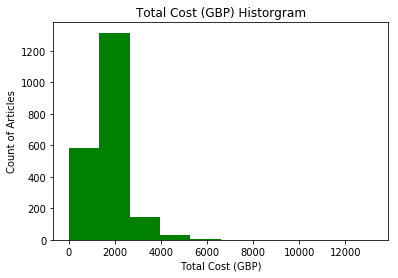

In [30]:
plt.hist(clean['Total Cost (GBP)'], color='green') 
plt.xlabel('Total Cost (GBP)')
plt.ylabel('Count of Articles')
plt.title('Total Cost (GBP) Historgram')
plt.show()

In [31]:
clean.groupby('Journal title').aggregate(np.mean)


,Total Cost (GBP),Journal id
Journal title,,
abnormal psychology,2534.530000,29
academy nutrition and dietetics,2379.540000,197
acquired immune deficiency syndromes,2034.750000,865
acquired immune deficiency syndroms (jaids),1836.920000,862
acs chemical biology,1418.186000,8
acs chemical neuroscience,1186.800000,14
acs nano,668.140000,15
acta crystallographica section d,757.180000,430
acta crystallographica section d biological crystallography,772.580000,429


In [52]:
clean.groupby('Journal title').agg({'Article title' : 'count', 'Total Cost (GBP)' : ['mean','median','std']})

Article title  \
                                                           count   
Journal title                                                      
abnormal psychology                                            1   
academy nutrition and dietetics                                1   
acquired immune deficiency syndromes                           1   
acquired immune deficiency syndroms (jaids)                    1   
acs chemical biology                                           5   
acs chemical neuroscience                                      1   
acs nano                                                       2   
acta crystallographica section d                               1   
acta crystallographica section d biological cry...             2   
acta crystallographica section f structural bio...             2   
acta crystallography d                                         1   
acta d                                                         1   
acta dermato venereologica                                     1   
acta diabetologica                                             1   
acta f                                                         1   
acta neuropathol                                               1   
acta neuropathologica                                          3   
acta opthalmologica                                            1   
acta physiol                                                   1   
addiction                                                      2   
advances in experimental medicine and biology                  4   
affective disorders                                            4   
age                                                            2   
age and ageing                                                 1   
ageing & society                                               1   
aging cell                                                     1   
aids                                                           5   
aids behav                                                     1   
aids care                                                      4   
aids research and therapy                                      1   
...                                                          ...   
trends in microbiology                                         1   
trends in molecular medicine                                   1   
trends in neuroscience                                         1   
trends in neurosciences                                        2   
trends in parasitology                                         4   
trials                                                         5   
trop med int health                                            1   
tropical animal health & production                            1   
tropical medicine and international health                     6   
tuberculosis                                                   2   
urban history                                                  1   
urolithiasis                                                   1   
vaccine                                                        5   
vascular pharmacology                                          1   
veterinary microbiology                                        1   
veterinary parasitology                                        2   
veterinary record                                              1   
veterinary research                                            1   
viral hepatitis                                                1   
virol                                                          1   
virological methods                                            1   
virology                                                      12   
virus research                                                 1   
vision                                                         1   
vision research                                                2   
visual neuroscience                    